# My Week 3 Assignment: To be peer graded

In [2]:
# You may need this setup
using Pkg
Pkg.add("Plots")
using Plots
gr() # Activate the GR backend for use with Plots
Flag=true

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
  Installed LibVPX_jll ───────── v1.8.1+1
  Installed FFMPEG_jll ───────── v4.1.0+3
  Installed FreeType2_jll ────── v2.10.1+2
  Installed DataAPI ──────────── v1.3.0
  Installed FFMPEG ───────────── v0.3.0
  Installed HTTP ─────────────── v0.8.15
  Installed Plots ────────────── v1.4.1
  Installed StatsBase ────────── v0.33.0
  Installed DataStructures ───── v0.17.18
  Installed OpenSSL_jll ──────── v1.1.1+2
  Installed Bzip2_jll ────────── v1.0.6+2
  Installed x264_jll ─────────── v2019.5.25+2
  Installed Contour ──────────── v0.5.3
  Installed IniFile ──────────── v0.5.0
  Installed Opus_jll ─────────── v1.3.1+1
  Installed OrderedCollections ─ v1.2.0
  Installed FriBidi_jll ──────── v1.0.5+3
  Installed SortingAlgorithms ── v0.3.1
  Installed Colors ───────────── v0.12.2
  Installed FixedPointNumbers ── v0.8.1
  Installed libfdk_aac_jll ───── v0.1.6+2
  Installed PlotThemes ───────── v2.0.0
  Installed Reexport ─────────── v0.2.0
  Installed Measures

true

Import the supplied data representing 15 pairs to x- and y-values. 

In [11]:
data_tofit = [1.6800483    -1.641695388; 
              0.501309281  -0.977697538; 
              1.528012113   0.52771122;
              1.70012253    1.711524991; 
              1.992493625   1.891000015;
              2.706075824  -0.463427794;
              2.994931927  -0.443566619;
              3.491852811  -1.275179133;
              3.501191722  -0.690499597;
              4.459924502  -5.516130799;
              4.936965851  -6.001703074;
              5.023289852  -8.36416901;
              5.04233698   -7.924477517;
              5.50739285  -10.77482371;
              5.568665171 -10.9171878]

# Create the arrays x and y, assigning x the first column of data_tofit and y the second column
xdata,ydata=data_tofit[:,1], data_tofit[:,2]
#size(xdata),size(ydata)

([1.6800483, 0.501309281, 1.528012113, 1.70012253, 1.992493625, 2.706075824, 2.994931927, 3.491852811, 3.501191722, 4.459924502, 4.936965851, 5.023289852, 5.04233698, 5.50739285, 5.568665171], [-1.641695388, -0.977697538, 0.52771122, 1.711524991, 1.891000015, -0.463427794, -0.443566619, -1.275179133, -0.690499597, -5.516130799, -6.001703074, -8.36416901, -7.924477517, -10.77482371, -10.9171878])

Then we do a scatterplot, this gives us the points the line must go through.

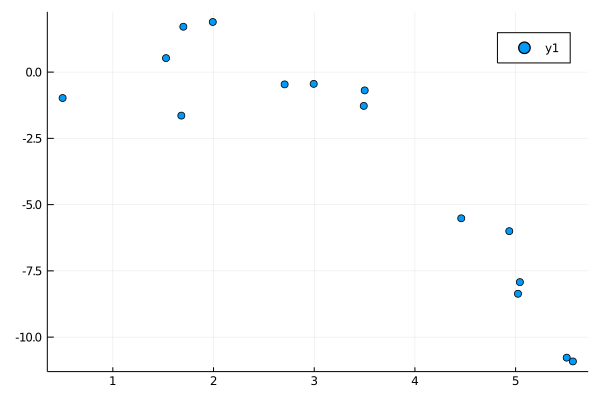

In [12]:
# Plot the x and y data points using a scatter plot of the x and y array variables
scatter(xdata,ydata)

For the line, we need a function, which we now define. Note that the parameters a, b, c need not be passed to the function: we will keep resetting them to try to improve the fit.

In [13]:
# Create a function called parabfit, with x as the argument, returning a*x^2 + b*x + c
f(x)=a*x^2 + b*x + c

f (generic function with 1 method)

Let's check that we do get a reasonable parabola. Choose your own interval [xmin, xmax] and parameters a, b, c. If it looks too much like a straight line, chance your choices until it does.

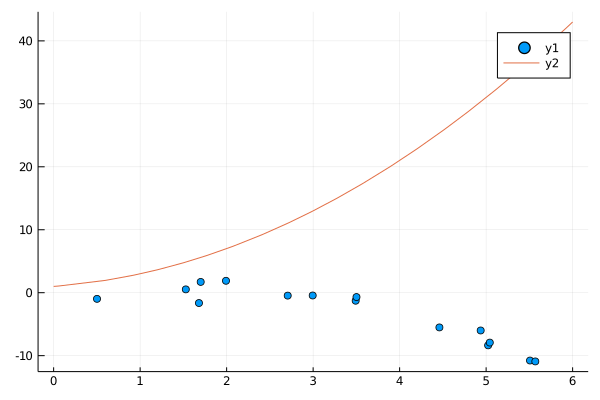

In [14]:
# Create variables a, b and c, assigning each the value 1
a = 1
b = 1
c = 1
# Plot the function parabfit, for x values between -5 and 5 
# -5 and 5 make no sense. The part above says to chose our own values
xmin,xmax=0.0,6.0
plot!(f,xmin,xmax)

Now we choose a, b, c and plot the curve together with the points. 

Note that by looking at where the data points lie, we can deduce some of the properties for a, b, c, as follows.

The plot must have a y-intersection that is close to 0, so c is close to 0. Also, the parabola is open downwards, so a must be negative. Finally, it has its maximum at a positive x, so b must be positive. 

Use plot() to start with the scatter plot and plot!() to add the curve for parabfit. (There are other ways to do this ...)

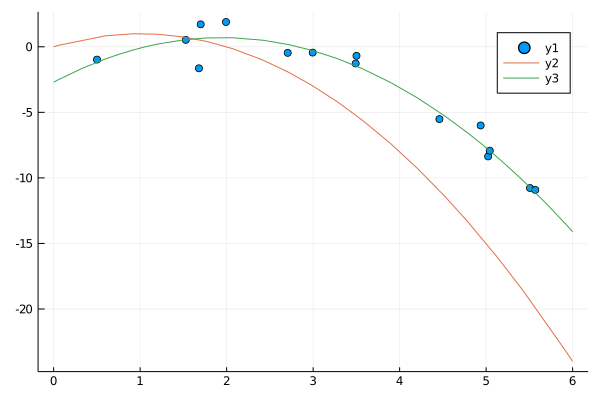

In [15]:
# Let's get rid of the very bad initial guess
scatter(xdata,ydata)
# More plot!() tries.
# a,b,c = 
a,b,c= -1, 2, 0
plot!(f,xmin,xmax)  #y2
a,b,c= -0.9, 3.5, -2.7
plot!(f,xmin,xmax)  #y3 good enough answer

Remarks on parameter tuning

I am a roboticist. I saw immediately that the max of the function was approximately zero and a value of x=2. From there, I got the parameters very quickly. Below, I do a least squares fit to the data. Least squares is often sensitive to **noise**, but for small problems like this, it works ok. The results are given below.




Let's do a least squares fit to check our hand tunng 
# https://github.com/JuliaNLSolvers/LsqFit.jl/blob/master/README.md

In [16]:
if Flag # If the Pkg is already loaded, no need to do it again
    using Pkg
    Pkg.add("LsqFit") 
    using LsqFit
    Flag=false
end

In [17]:
@. model(x, p) = p[3]*x^2+p[2]*x+p[1]
p0=[0; 2.0; -1]
fit = curve_fit(model, xdata, ydata, p0; autodiff=:finiteforward)

LsqFit.LsqFitResult{Array{Float64,1},Array{Float64,1},Array{Float64,2},Array{Float64,1}}([-2.7478360732006393, 3.510725087813794, -0.8954949263466614], [2.2644568200577613, -0.23522718679176224, -0.001937208684338998, -1.0790516613359404, -1.198881211337416, 0.6583082391564716, 0.17786646192686123, -0.1325235965098801, -0.7428992470912538, 0.6136397467421455, -1.2402667544399435, 0.6553043100399165, 0.11079661125725515, 0.2003365628388334, -0.04992188258217034], [1.0000000036294423 1.6800482946976285 2.822562277317047; 1.0000000036294423 0.5013092774146616 0.2513110041618347; … ; 1.0000000144751848 5.507392808837831 30.33137607574463; 1.0000000144751848 5.5686652055676955 31.010031700134277], true, Float64[])

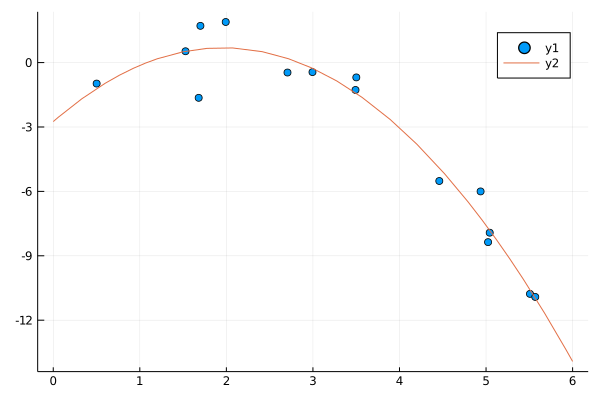

In [18]:
c, b, a=-2.7478361288184256, 3.5107251294355315, -0.8954949324362259
scatter(xdata,ydata)
plot!(f,xmin,xmax)


THE END